# NETFLIX Project

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

### Problem Statements

##### Q1) What is the most frequent genre of movies released on Netflix?

##### Q2) What is the ratio of Movies to TV Shows available on Netflix?

##### Q3) Which year most content was added to Netflix.

##### Q4) What is the distribution of content ratings across Movies and TV Shows?

##### Q5) Which countries are the largest producers of content for Netflix?

#### Data Collections

In [32]:
df = pd.read_csv("netflix.csv", lineterminator="\n")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [34]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Data Cleaning

Removing NaN

In [35]:
df.notnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,True,True,True,True,False,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,True,True
3,True,True,True,False,False,False,True,True,True,True,True,True
4,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,True,True,True,True,True,True,True,True,True,True,True,True
8803,True,True,True,False,False,False,True,True,True,True,True,True
8804,True,True,True,True,True,True,True,True,True,True,True,True
8805,True,True,True,True,True,True,True,True,True,True,True,True


In [37]:
df = df.dropna()
df2 = df.copy()
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Removing Dublicates

In [36]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [38]:
df = df.drop_duplicates()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Removing Unwanted Columns

Removing Column "Description" from dataset as it is not required for Data Analysis

In [9]:
df.drop(columns="description", inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


#### Problem in General

Need some improvements in certain columns

In [10]:
df["listed_in"] = df["listed_in"].str.split(',')
df = df.explode("listed_in")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV
...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies


### Final Data Analysis

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11858 entries, 7 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       11858 non-null  object
 1   type          11858 non-null  object
 2   title         11858 non-null  object
 3   director      11858 non-null  object
 4   cast          11858 non-null  object
 5   country       11858 non-null  object
 6   date_added    11858 non-null  object
 7   release_year  11858 non-null  int64 
 8   rating        11858 non-null  object
 9   duration      11858 non-null  object
 10  listed_in     11858 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


### Data Analysis

##### Q1) What is the most frequent genre of movies released on Netflix?

In [13]:
genre = df["listed_in"].value_counts()
print (genre)

listed_in
 International Movies    2260
Dramas                   1518
Comedies                 1127
Action & Adventure        806
 Dramas                   775
                         ... 
TV Dramas                   1
Classic & Cult TV           1
LGBTQ Movies                1
TV Horror                   1
 Science & Nature TV        1
Name: count, Length: 70, dtype: int64


In [14]:
print ("Most frequent genre of movies released on Netflix is", genre.index[0], ":", genre.iloc[0])

Most frequent genre of movies released on Netflix is  International Movies : 2260


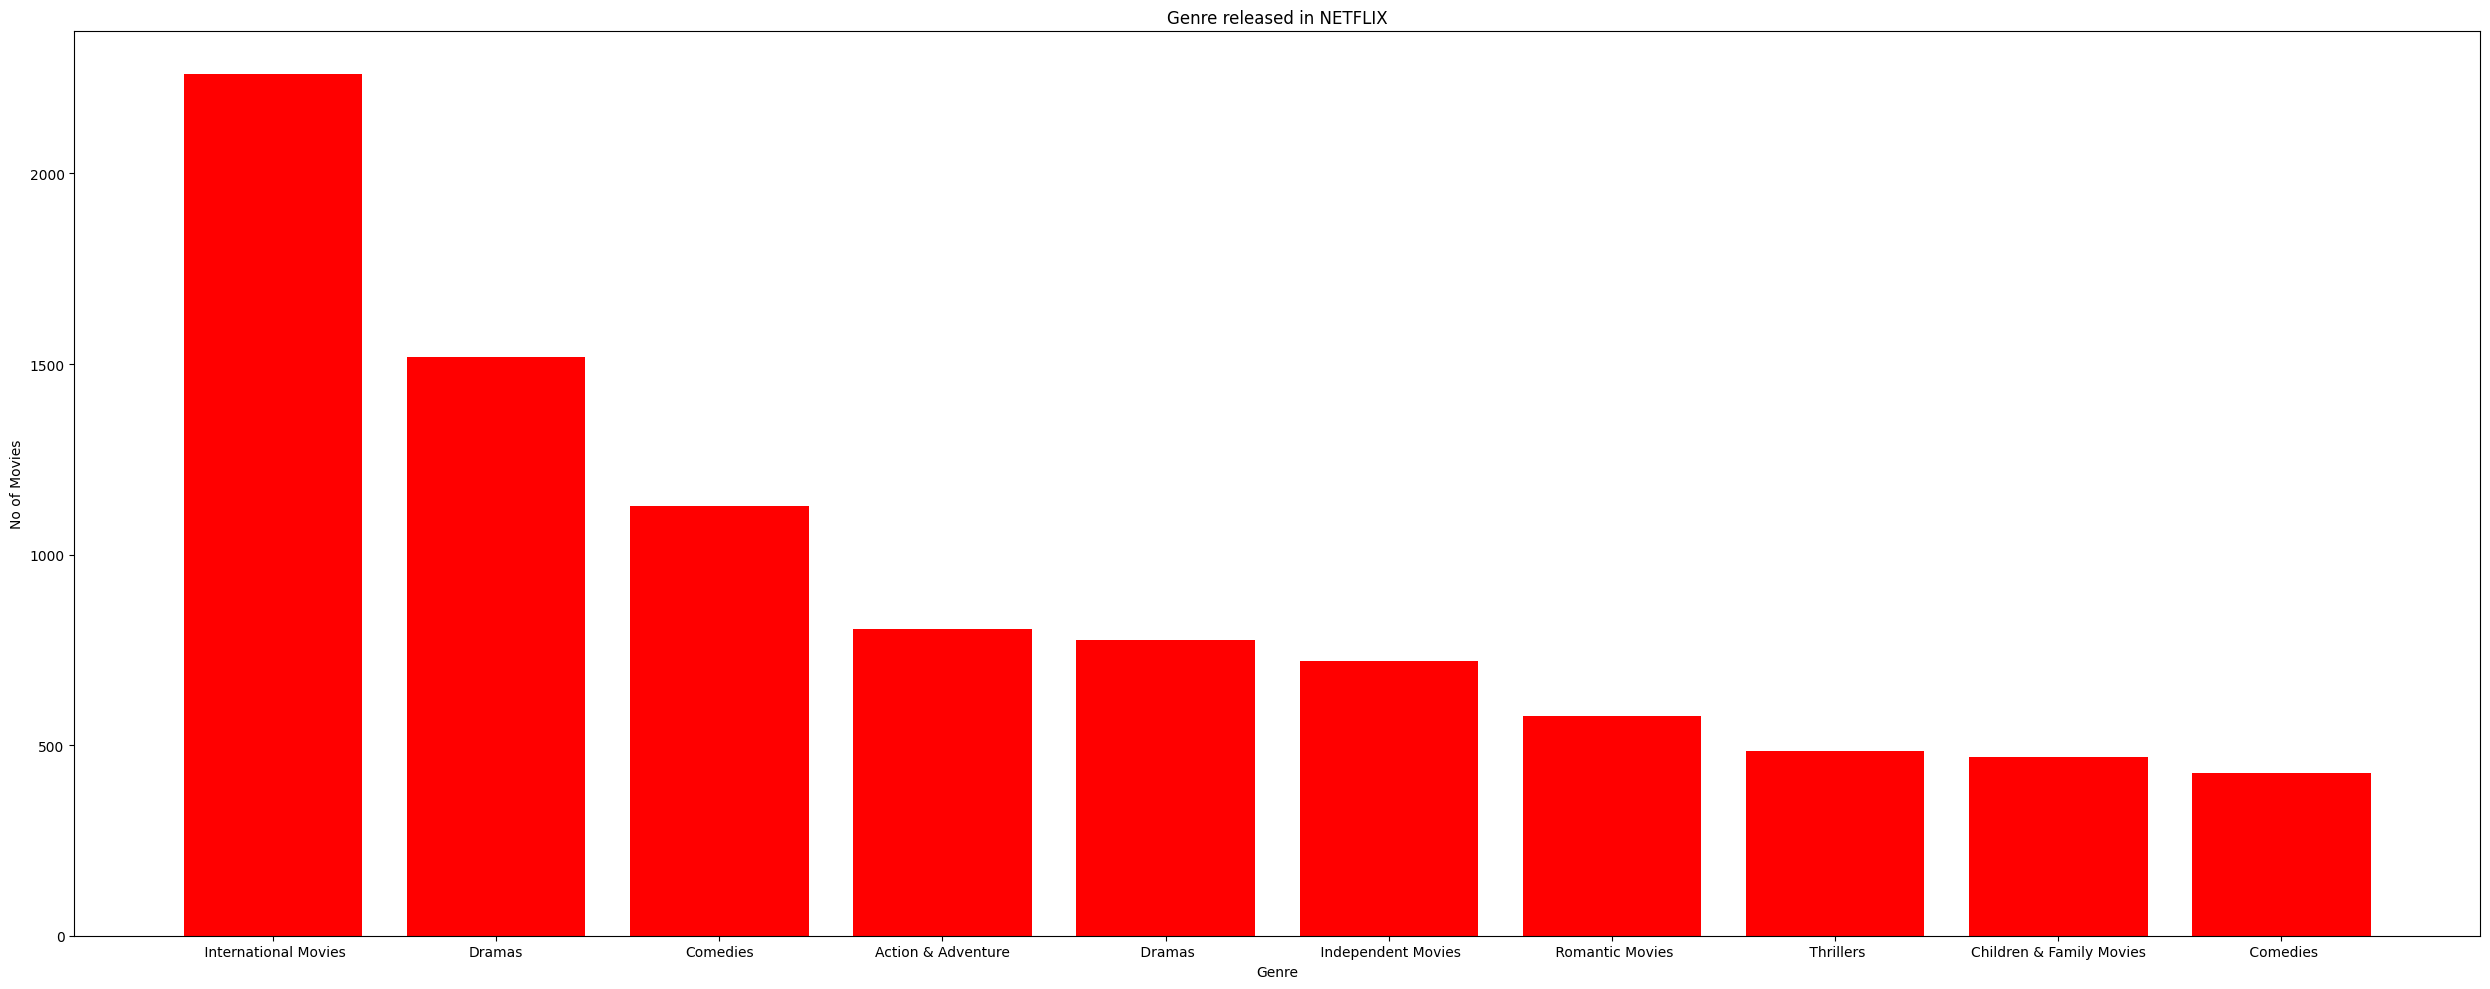

In [15]:
top10 = genre.head(10)
plt.figure(figsize = (25,10))
plt.bar(top10.index, top10.iloc, color = 'red')
plt.ylabel('No of Movies')
plt.xlabel('Genre')
plt.title("Genre released in NETFLIX")
plt.tight_layout()
plt.show()

##### Q2) What is the ratio of Movies to TV Shows available on Netflix?

In [16]:
ratio = df2['type'].value_counts()
print (ratio)

type
Movie      5185
TV Show     147
Name: count, dtype: int64


In [17]:
print ("The ratio of Movies to TV Shows available on Netflix is", ratio.iloc[0], ":", ratio.iloc[1])

The ratio of Movies to TV Shows available on Netflix is 5185 : 147


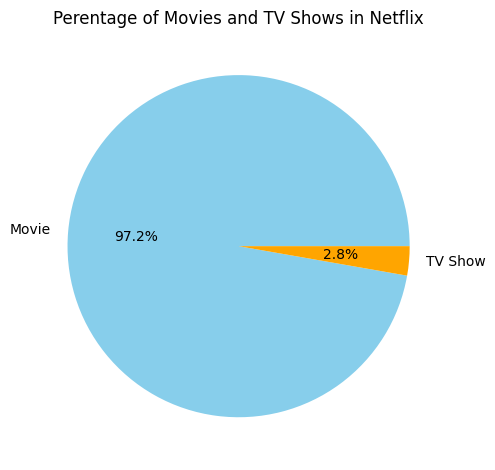

In [18]:
plt.pie(ratio.values, colors = ['skyblue','orange'], labels = ratio.index, autopct='%1.1f%%')
plt.title ("Perentage of Movies and TV Shows in Netflix")
plt.tight_layout()
plt.show()

##### Q3) Which year most content was added to Netflix.

In [19]:
df2['year_added'] = pd.to_datetime(df2['date_added'],format='mixed').dt.year
content = df2["year_added"].value_counts()
print ("Most content was added in Year",content.index[0],"with",content.iloc[0],"no of shows by Netflix")

Most content was added in Year 2019 with 1265 no of shows by Netflix


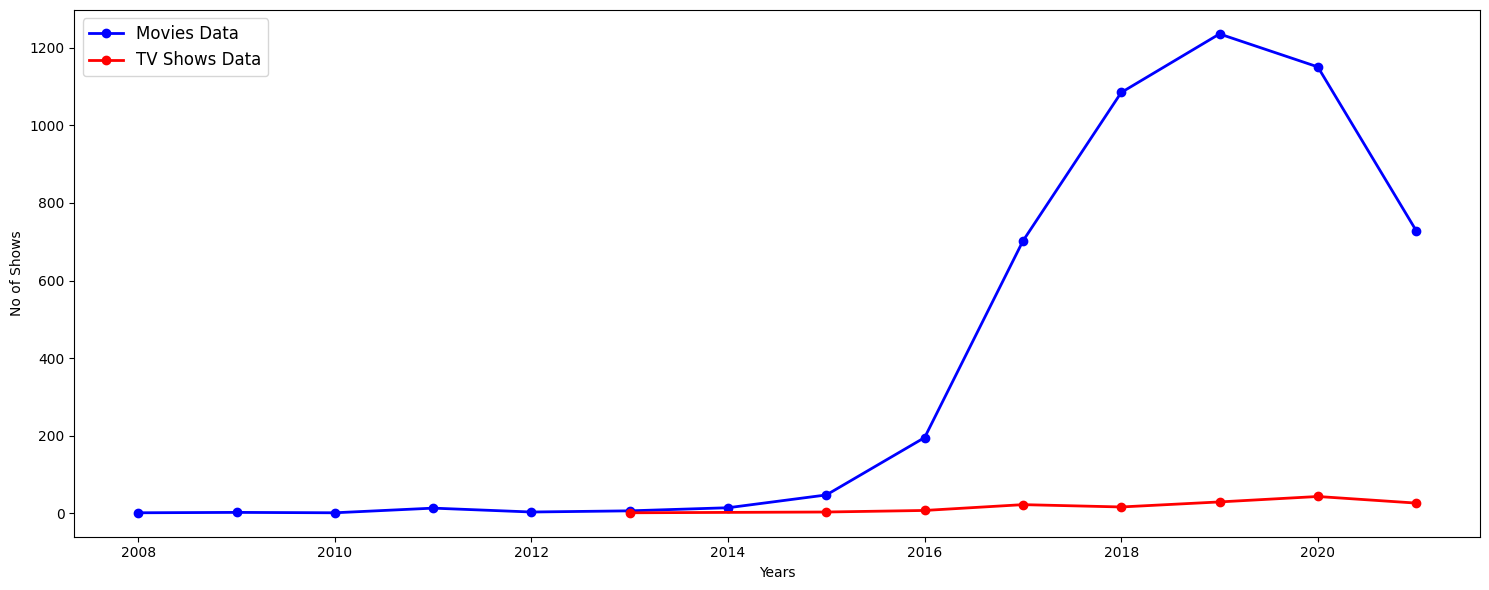

In [20]:
grouped = df2.groupby("type")["year_added"].value_counts(sort=False)
plt.figure(figsize = (15,6))
plt.plot(grouped['Movie'].index, grouped['Movie'].values, color='blue',linewidth=2,marker='o',label='Movies Data')
plt.plot(grouped['TV Show'].index, grouped['TV Show'].values, color='red',linewidth=2,marker='o',label='TV Shows Data')
plt.xlabel("Years")
plt.ylabel("No of Shows")
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()
plt.show()

##### Q4) What is the distribution of content ratings across Movies and TV Shows?

In [21]:
rating = pd.crosstab(df2['rating'], df2['type'])
rating

type,Movie,TV Show
rating,,
G,40,0
NC-17,2,0
NR,58,0
PG,275,0
PG-13,470,0
R,778,0
TV-14,1177,37
TV-G,81,3
TV-MA,1741,81


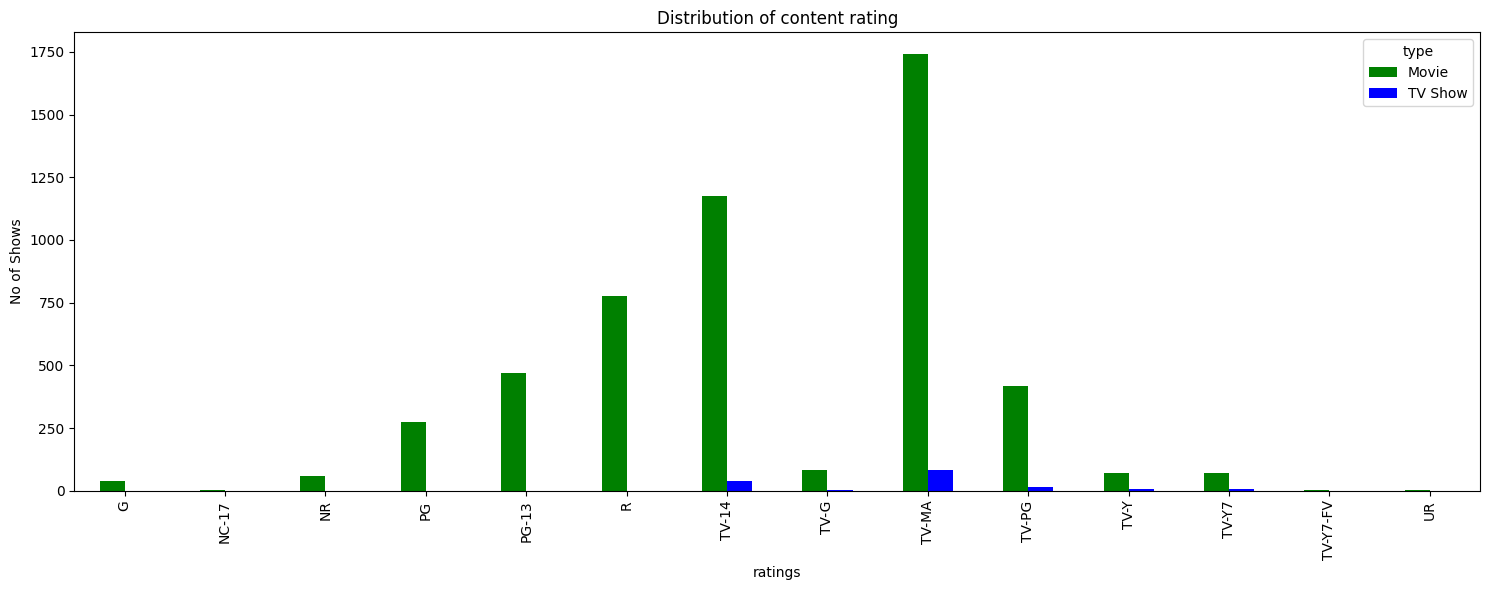

In [22]:
rating.plot(kind='bar',figsize = (15,6), color=["green","blue"]) 
plt.xlabel("ratings")
plt.ylabel("No of Shows")
plt.title("Distribution of content rating")
plt.tight_layout()
plt.show()

##### Q5) Which countries are the largest producers of content for Netflix?

In [28]:
df3 =  df2.copy()
df2["country"] = df2["country"].str.strip()
df2["country"] = df2["country"].str.split(",")
df2 =  df2.explode("country")
country = df2["country"].value_counts()
print (country)

country
United States     2485
India              940
United Kingdom     485
Canada             295
France             293
                  ... 
Somalia              1
Sudan                1
Panama               1
East Germany         1
Montenegro           1
Name: count, Length: 110, dtype: int64


In [30]:
print ("The largest country to produce content for Netflix is", country.index[0], ":", country.iloc[0])

The largest country to produce content for Netflix is United States : 2485


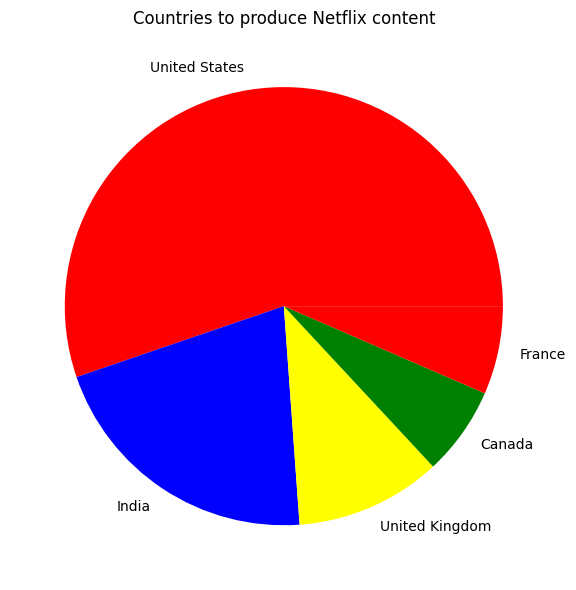

In [29]:
country = country.head(5)
plt.figure(figsize = (15,6))
plt.pie(country.values, labels = country.index, colors = ['red','blue','yellow','green'])
plt.title ("Countries to produce Netflix content")
plt.tight_layout()
plt.show()

### CONCLUSION

#### Q1) What is the most frequent genre of movies released on Netflix?

In the given dataset, the most frequent genre of movies that released on Netflix is **International Movies** with **2260 movies**

#### Q2) What is the ratio of Movies to TV Shows available on Netflix?

In the given dataset, the ratio of Movies to TV Shows is **5185 : 147**

#### Q3) Which year most content was added to Netflix?

In **2019**, **1265 content** got released in Netflix, making it the busiest year

#### Q4) What is the distribution of content ratings across Movies and TV Shows?

Highest number of **TV-MA** rated contents were produced by Netflix containing **1741 movies** and **81 TV Shows**

#### Q5) Which countries are the largest producers of content for Netflix?

**United States** produced **2485 contents** so far, making them the highest producing country in Netflix